In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astro

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
config = astro.core.DEFAULT_CONFIG._replace(seed=10)
script = astro.ScriptBot.create(config)
astro.save_log('out/eg.log', astro.play(config, [script, script]))

solo_config = astro.core.SOLO_CONFIG._replace(seed=10)
astro.save_log('out/eg.solo.log', astro.play(solo_config, [astro.ScriptBot.create(solo_config)]))

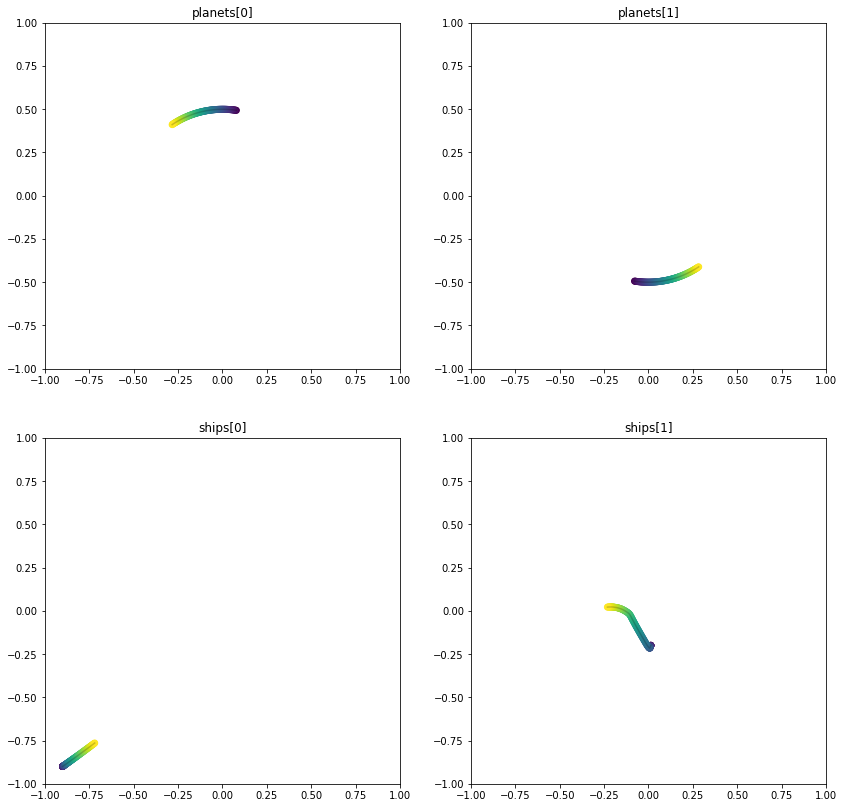

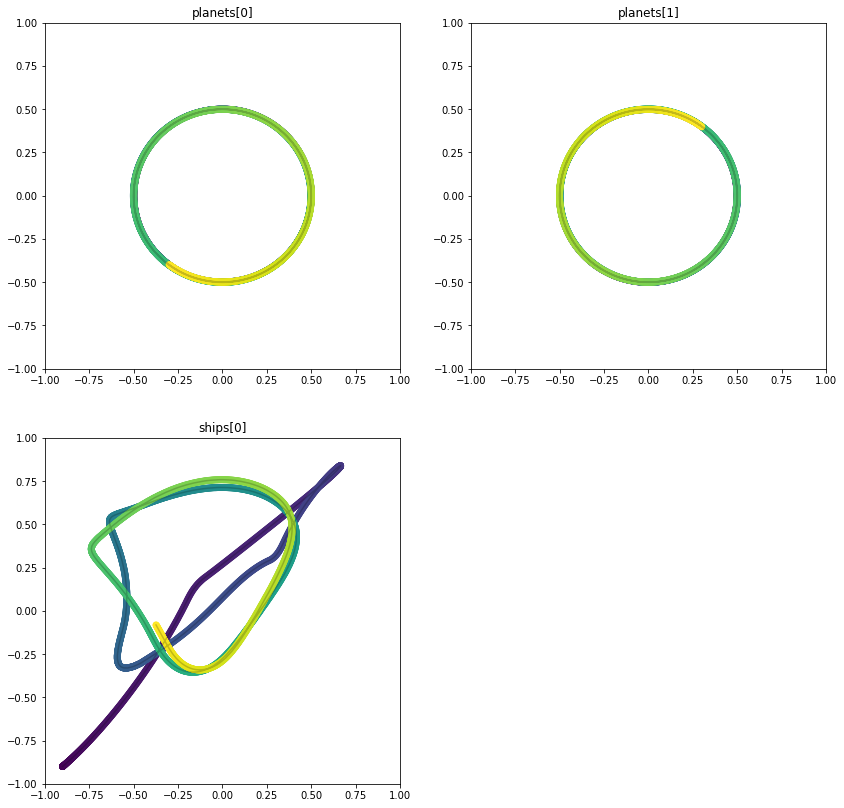

In [17]:
def _get_trajectory(ticks, object_type, index):
    return np.array(
        [getattr(tick.state, object_type).x[index]
         for tick in ticks
         if tick is not None])

def plot_trajectory(ticks, object_type, index):
    xs, ys = _get_trajectory(ticks, object_type, index).T
    ts = np.arange(len(xs))
    plt.plot(xs, ys, c='k', alpha=0.2)
    plt.scatter(x=xs, y=ys, c=ts)
    plt.title('{}[{}]'.format(object_type, index))
    plt.xlim((-1 , 1))
    plt.ylim((-1 , 1))

def plot_all(game):
    ticks = game.ticks
    nships, nplanets = ticks[0].state.ships.x.shape[0], ticks[0].state.planets.x.shape[0]
    ncols = max(nships, nplanets)
    plt.figure(figsize=(14, 2 * 14 / ncols))
    for n in range(nplanets):
        plt.subplot(2, ncols, 1 + n)
        plot_trajectory(ticks, 'planets', n)
    for n in range(nships):
        plt.subplot(2, ncols, 1 + ncols + n)
        plot_trajectory(ticks, 'ships', n)

plot_all(astro.load_log('out/eg.log'))
plot_all(astro.load_log('out/eg.solo.log'))